In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import seispy.utils.responses as rsps
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from seispy.station import StationArray
from scipy.linalg import pinv, svd
import os
os.environ['PROJ_LIB'] = '/home/patrick.meyers/anaconda3/envs/meyers/share/proj'
from seispy import plot as hplot
from seispy.station import homestake, spiral
from seispy.station.stationdata import SeismometerArray
plt.style.use('stylesheet.mplstyle')

In [2]:
duration=1000
freq=1
velocity=5700
amplitude=3
fft_duration = 100
nside=8
stations=homestake(origin='TPK')
data = SeismometerArray.initialize_all_good(stations, duration, chans_type='fast_chans')
data.add_p_wave(amplitude, np.radians(30), np.radians(60), freq, duration, c=velocity)

# Quick recovery method

In [3]:
out_dict = data.power_recovery('p', [velocity], inv_condition=1e-5, frequency=freq, nside=nside, stations=stations, fft_duration=fft_duration)

2628


100%|██████████| 24/24 [00:07<00:00,  3.08it/s]


In [4]:
recovery = np.real(out_dict['p'])
print(f'Recovered: {np.sum(recovery)} m^2 Hz^{-1}')
recovery = np.real(out_dict['p'])
print(f'Recovered: {np.sum(recovery) /fft_duration } m^2')
print(f'injected: {amplitude**2} m^2')

Recovered: 899.9771589150085 m^2 Hz^-1
Recovered: 8.999771589150086 m^2
injected: 9 m^2


/home/patrick.meyers/anaconda3/envs/seismic_work/lib/python3.9/site-packages/matplotlib/projections/geo.py:394: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))
/home/patrick.meyers/git_repos/seismic_radiometer/seispy/plot.py:496: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu_r").copy()
  aximg.cmap.set_bad('w', alpha=0.)


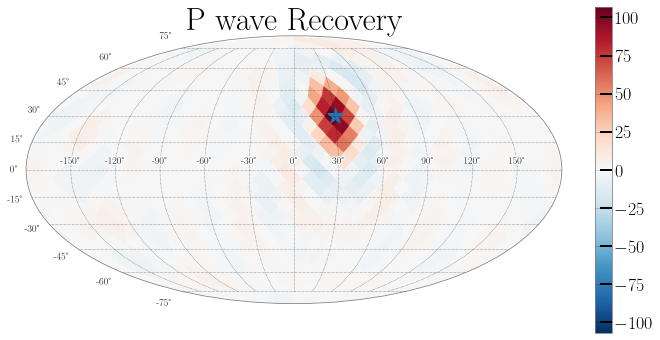

In [5]:
recmax = np.abs(np.real(recovery)).max()
plt.figure(figsize=(12,6))
ax = plt.subplot(111, projection='mollweide')
hplot.healpix_heatmap(np.real(recovery), cmap='RdBu_r', vmin=-recmax, vmax=recmax)
plt.colorbar()
plt.title("P wave Recovery", fontsize=32)
hplot.outline_text(ax)
ax.scatter(np.radians(30), np.radians(30), marker='*', s=256, color='C0')
ax.grid(True)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
plt.show()